In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

In [2]:
f=lambda x:1/(1+x**2)

In [3]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

    

In [4]:
R=RectangleG(-1,1,55,f)

In [74]:
R.integrate(f)

1.5706861339597251

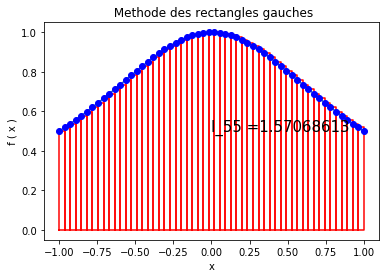

In [75]:
R.Graph(f)

In [5]:
np.pi/2


1.5707963267948966

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [7]:
def simul(n,f):
    R=RectangleG(-1,1,n,f)
    return R.Graph(f)

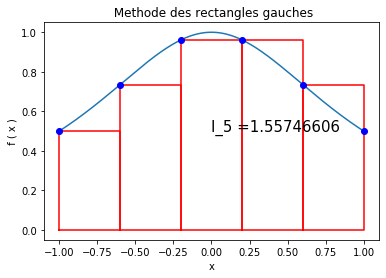

In [8]:
simul(5,f)

In [9]:
interact(simul,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

In [10]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des Trapèzes' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [12]:
def sim(n,f):
    R=RectangleG(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f) 
    fig= plt.figure(figsize=(12,4))
    plt.subplot(121)
    R.Graph(f)  
    plt.subplot(122)    
    T.Graph(f)
    plt.show()

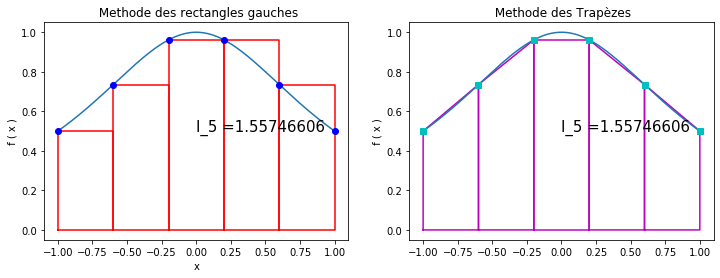

In [13]:
sim(5,f)

In [15]:
interact(simul,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

In [16]:
interact(sim,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…